Стандартизированная оценка (z-оценка) — это относительная мера, которая показывает, на сколько среднеквадратичных отклонений наблюдаемое значение отличается от среднего значения распределения. Знак z-оценки показывает, находится ли значение левее среднего (–) или правее среднего (+).

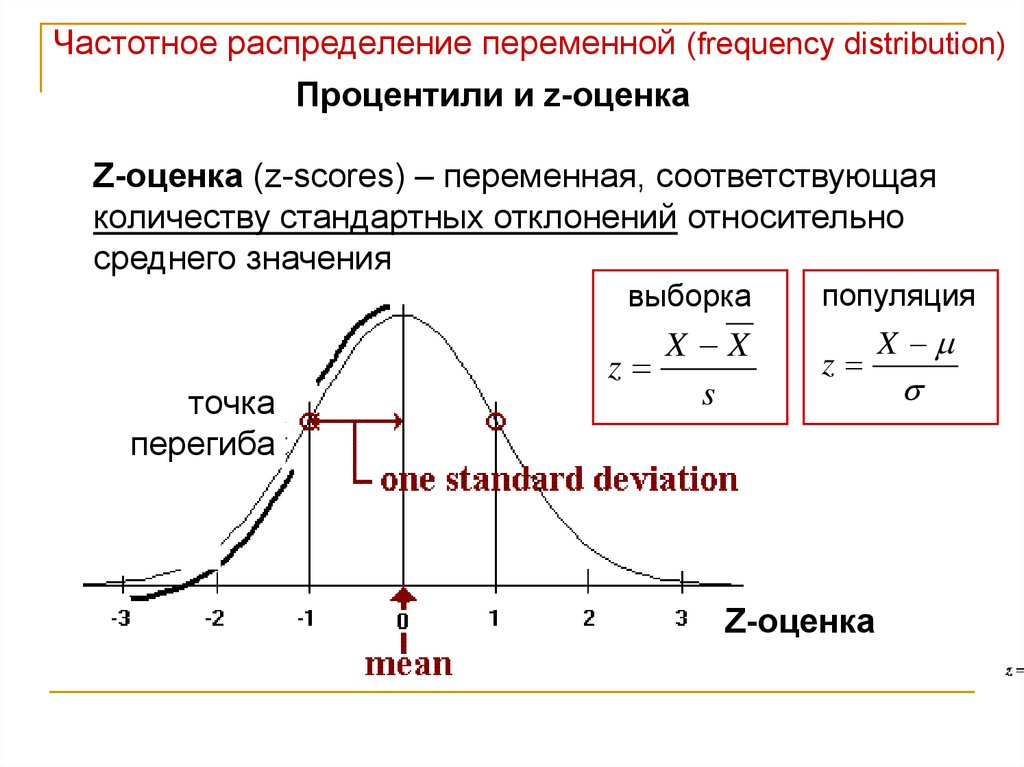

Выброс — это аномальное значение в данных, которое значительно отличается от значения, выраженного мерой центральной тенденции.

## Z-оценка

In [1]:
import pandas as pd
import scipy.stats

Загрузите датасет eng_test.csv. Обратите внимание на сепаратор (sep=';'). Выведите первые 5 элементов

In [2]:
df = pd.read_csv('./eng_test.csv', sep=';', index_col='Id')
df.head(5)

,Exam,Score,Advanced
Id,,,
ID1,TOEFL,77.0,NO
ID10,TOEFL,105.0,NO
ID100,TOEFL,107.0,YES
ID101,TOEFL,72.0,NO
ID102,TOEFL,120.0,YES


Постойте гистограмму по оценкам студентов

Text(0, 0.5, 'Score count')

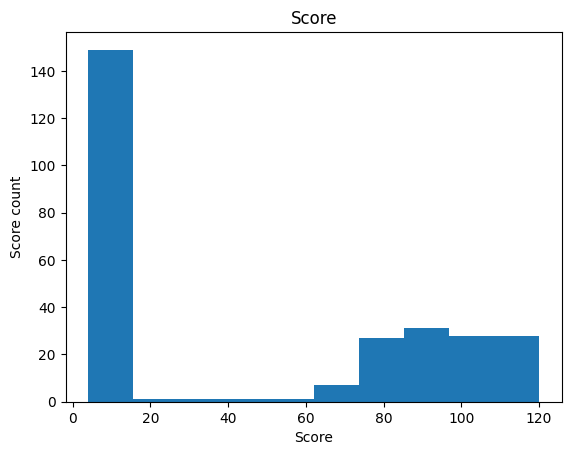

In [3]:
import matplotlib.pyplot as plt
plt.hist(df.Score)
plt.title('Score')
plt.xlabel('Score')
plt.ylabel('Score count')

Создайте переменную, содержащую информацию только об оценках TOEFL и выведите гисограмму и основные статистики

Id
ID1       77.0
ID10     105.0
ID100    107.0
ID101     72.0
ID102    120.0
         ...  
ID95      88.0
ID96      90.0
ID97      90.0
ID98      54.0
ID99     106.0
Name: Score, Length: 125, dtype: float64

Statistics:
count    125.000000
mean      93.776000
std       17.903804
min       25.000000
25%       81.000000
50%       94.000000
75%      107.000000
max      120.000000
Name: Score, dtype: float64


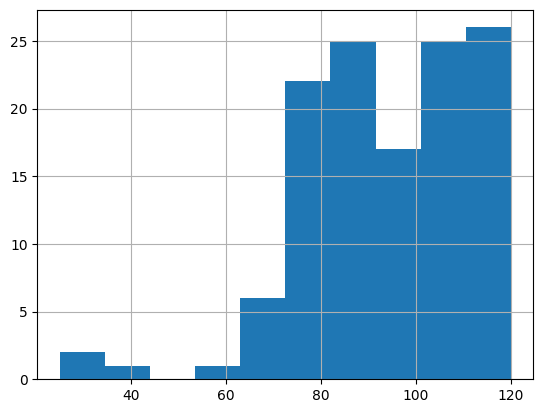

In [4]:
toefl_score = df[df['Exam'] == 'TOEFL']['Score']
print(toefl_score)
toefl_score.hist()
print()
print('Statistics:')
print(toefl_score.describe(include='all'))

Создайте переменную, содержащую информацию только об оценках IELTS и выведите гисограмму и основные статистики

Id
ID126    9.0
ID127    5.0
ID128    7.5
ID129    5.0
ID130    4.0
        ... 
ID270    8.0
ID271    6.5
ID272    4.0
ID273    7.0
ID274    8.0
Name: Score, Length: 149, dtype: float64

Statistics:
count    149.000000
mean       6.432886
std        1.571126
min        4.000000
25%        5.000000
50%        6.500000
75%        8.000000
max        9.000000
Name: Score, dtype: float64


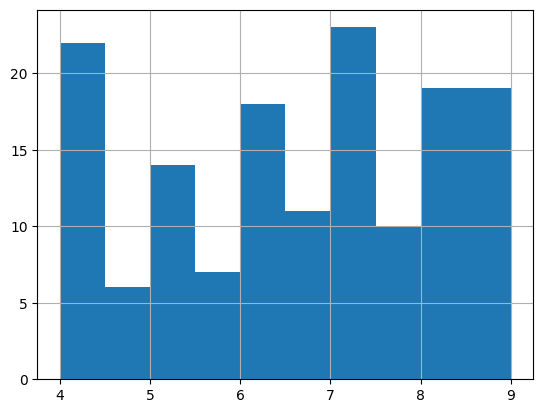

In [5]:
ielts_score = df[df['Exam'] == 'IELTS']['Score']
ielts_score.hist()
print(ielts_score)

print()
print('Statistics:')
print(ielts_score.describe(include='all'))

Посчитайте z-score для первого студента в списке toefl. Также выведите стандартное отклонение, среднее и само кол-во баллов.

In [6]:
z_score = (toefl_score[0] - toefl_score.mean())/toefl_score.std()
print(f'Std: {toefl_score.std()}\nMean: {toefl_score.mean()}\nZ-score: {z_score}')

Std: 17.90380388488399
Mean: 93.776
Z-score: -0.9370075827385381


In [7]:
scipy.stats.zscore(toefl_score)   # Z-score через библиотеку scipy.stats

Id
ID1     -0.940778
ID10     0.629429
ID100    0.741586
ID101   -1.221172
ID102    1.470611
           ...   
ID95    -0.323911
ID96    -0.211754
ID97    -0.211754
ID98    -2.230591
ID99     0.685507
Name: Score, Length: 125, dtype: float64

сохраните в переменные Z-score для ielts и toefl

In [8]:
toefl = scipy.stats.zscore(toefl_score)
ielts = scipy.stats.zscore(ielts_score)

In [9]:
eng = pd.DataFrame(pd.concat([toefl, ielts]))#собираем результаты обратно в 1 датафрейм
df['z_score'] = eng
df.head()

,Exam,Score,Advanced,z_score
Id,,,,
ID1,TOEFL,77.0,NO,-0.940778
ID10,TOEFL,105.0,NO,0.629429
ID100,TOEFL,107.0,YES,0.741586
ID101,TOEFL,72.0,NO,-1.221172
ID102,TOEFL,120.0,YES,1.470611


In [10]:
df[df['z_score'] < -3] # кто написал экзамен хуже, чем 3 стандартных отклонения

,Exam,Score,Advanced,z_score
Id,,,,
ID121,TOEFL,32.0,NO,-3.464325
ID123,TOEFL,25.0,YES,-3.856877


In [11]:
df.groupby('Advanced').z_score.mean() #кто сдал экзамен лучше? Кто брал продвинутый курс или нет?

Advanced
NO    -0.397672
YES    0.440499
Name: z_score, dtype: float64

Экзамен лучше сдали те, кто брал продвинутый курс, так как их z-оценка выше среднего (со знаком +)

# Выбросы
### Разберем, как выбросы влияют на меры центральной тенденции

In [12]:
import pandas as pd
import numpy as np

bikes = pd.read_pickle('BikesDataVars.pkl')
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


In [13]:
bikes['Rental Count'].describe()

count    8760.000000
mean      696.582078
std       749.812613
min         0.000000
25%       157.000000
50%       425.500000
75%      1009.000000
max      6012.000000
Name: Rental Count, dtype: float64

Найдите интерквартильный размах по атрибуту 'Rental Count'

In [14]:
q = [0.25, 0.75]
q1, q3 = bikes['Rental Count'].quantile(q=q)
iqr = q3 - q1
print(iqr)

852.0


Найдите интерквартильный размах по атрибуту 'Rental Count', а также выведите значения q1 - 1.5 * iqr, q1 + 1.5 * iqr

In [15]:
iqr_outlier_threshold_up = q3 + 1.5 * iqr
iqr_outlier_threshold_bottom = q1 - 1.5 * iqr
print(iqr_outlier_threshold_up)
print(iqr_outlier_threshold_bottom)

2287.0
-1121.0


In [16]:
bikes[bikes['Rental Count'] > iqr_outlier_threshold_up].shape # Определили элементы-выбросы. shape Возвращает кортеж, представляющий размерность DataFrame. (строк, колонок)


(413, 14)

Определите, в какие часы какое количество выбросов было зафиксировано. (value_counts)

In [17]:
bikes[bikes['Rental Count'] > iqr_outlier_threshold_up]['Hour'].value_counts()

Hour
18    95
19    64
17    51
20    48
21    39
8     38
16    23
22    21
15    10
14     8
13     7
23     4
7      4
9      1
Name: count, dtype: int64

Выведите количество выбросов по сезонам

In [18]:
bikes[bikes['Rental Count'] > iqr_outlier_threshold_up]['Seasons'].value_counts()

Seasons
Summer    196
Autumn    116
Spring    101
Name: count, dtype: int64

Выведите среднее, среднеквадратичное отклонение и пороги для атрибута Rental Count (+- 2.5 стандартных отклонений)

In [19]:
#Ваш код
mean = bikes['Rental Count'].mean()
std = bikes['Rental Count'].std()
std_outlier_threshold_bottom = q1 - 2.5 * iqr
std_outlier_threshold_up = q3 + 2.5 * iqr

print(f'mean: {mean}')
print(f'std: {std}')
print(f'std_outlier_threshold_bottom: {std_outlier_threshold_bottom}')
print(f'std_outlier_threshold_up : {std_outlier_threshold_up}')

mean: 696.5820776255708
std: 749.8126131159588
std_outlier_threshold_bottom: -1973.0
std_outlier_threshold_up : 3139.0


Определите количество выбросов по данной метрике (с shape)

In [20]:
bikes[(bikes['Rental Count'] > std_outlier_threshold_up) | (bikes['Rental Count'] < std_outlier_threshold_bottom)].shape

(128, 14)

Выведите количество выбросов по сезонам

In [21]:
#Посмотрим "нормальные" значения после фильтрации каждой метрикой
iqr_bikes_no_outliers = bikes[bikes['Rental Count'] <= iqr_outlier_threshold_up]
std_bikes_no_outliers = bikes[bikes['Rental Count'] <= std_outlier_threshold_up]


In [22]:
#посмотрим меры центральной тенденции 
print(bikes['Rental Count'].mean())
print(iqr_bikes_no_outliers['Rental Count'].mean())
print(std_bikes_no_outliers['Rental Count'].mean())

696.5820776255708
584.146280100635
651.9573679332716


In [23]:
print(bikes['Rental Count'].median())
print(iqr_bikes_no_outliers['Rental Count'].median())
print(std_bikes_no_outliers['Rental Count'].median())

425.5
392.0
414.0


Сравните устойчивость мер центральной тенденции к применению фильтров: так как std_outlier_threshold_up расположено ближе к крайним значениям выборки, чем iqr_outlier_threshold_up то и меры центральной тенденции более приближены к медиане без фильтров

# Пропущенные значения

In [24]:
import pandas as pd
import numpy as np

bikes = pd.read_pickle('BikesData.pkl')
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


In [25]:
bikes.info() #обратите внимание на кол-во значений в Temperature. Есть пропущенные значения


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  8760 non-null   datetime64[ns]
 1   Hour                  8760 non-null   int64         
 2   Temperature           8581 non-null   float64       
 3   Humidity              8760 non-null   int64         
 4   Wind speed            8760 non-null   float64       
 5   Rainfall              8760 non-null   float64       
 6   Snowfall              8760 non-null   float64       
 7   Seasons               8760 non-null   object        
 8   Holiday               8760 non-null   int64         
 9   Functioning Day       8760 non-null   bool          
 10  Rental Count          8760 non-null   int64         
 11  Normal Humidity       8760 non-null   int64         
 12  Temperature Category  8581 non-null   category      
 13  Good Weather      

Посчитайте количество пустых ячеек (isna())

In [26]:
bikes.isna().sum()

Date                      0
Hour                      0
Temperature             179
Humidity                  0
Wind speed                0
Rainfall                  0
Snowfall                  0
Seasons                   0
Holiday                   0
Functioning Day           0
Rental Count              0
Normal Humidity           0
Temperature Category    179
Good Weather              0
dtype: int64

Посчитайте количество заполненных ячеек (notna())

In [27]:
bikes.notna().sum()

Date                    8760
Hour                    8760
Temperature             8581
Humidity                8760
Wind speed              8760
Rainfall                8760
Snowfall                8760
Seasons                 8760
Holiday                 8760
Functioning Day         8760
Rental Count            8760
Normal Humidity         8760
Temperature Category    8581
Good Weather            8760
dtype: int64

Создайте новый датафрэйм bikes1. Скопируйте туда старый. Заполните пустые ячейки числом 42.

In [28]:
from copy import deepcopy
bikes1 = deepcopy(bikes)
bikes1['Temperature'].fillna(42, inplace=True)
print(bikes1.isna().sum())

Date                      0
Hour                      0
Temperature               0
Humidity                  0
Wind speed                0
Rainfall                  0
Snowfall                  0
Seasons                   0
Holiday                   0
Functioning Day           0
Rental Count              0
Normal Humidity           0
Temperature Category    179
Good Weather              0
dtype: int64


dropna не удаляет значения из датасета, если не добавить параметр inplace=True (но лучше так не надо)

In [29]:
bikes.dropna(subset=['Temperature']).shape

(8581, 14)

Заполните пустые ячейки в bikes медианой. (но созраняем в другую колонку)

In [30]:
bikes['Temperature_Median'] = bikes['Temperature'].fillna(bikes['Temperature'].median())
bikes.iloc[38:42] # выводим строку с пропуском + ближайшие

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather,Temperature_Median
38,2017-12-02,14,7.3,35,1.3,0.0,0.0,Winter,0,True,1054,0,Chilly,0,7.3
39,2017-12-02,15,NaN,41,2.3,0.0,0.0,Winter,0,True,688,1,NaN,0,13.7
40,2017-12-02,16,6.4,48,2.6,0.0,0.0,Winter,0,True,592,1,Chilly,0,6.4
41,2017-12-02,17,6.0,51,2.5,0.0,0.0,Winter,0,True,141,1,Chilly,0,6.0


In [31]:
np.random.choice(bikes['Temperature'].dropna()) # генератор случайных объектов из массива

13.0

В функцию fillna можно передавать вектор значений. Он будет служить для заполнений пустых значений, главное чтобы количество элементов совпала

In [32]:
temps = np.random.choice(bikes['Temperature'].dropna(), 8760)
temps[:100]

array([  8.1,  25.3,   7.6,  12.2,   7.9,   0.2,  20.6,  15.6,  19.5,
        -0.2,  28.9,  -2.7,  24. ,  22.5,  -9.4,  -6.9,  12.6,   1.2,
        22.3,  18. ,  21.8,  35.1,  -1.3,  32.7,   1.6,  31.5,  -3. ,
        11.7,  -7.6,   6.7,  10. ,  23.4,  23.6,   2.6,  18. ,  29.4,
         1.2,  29.3,  21.2,  -4.5,  12.8,   4.8,  -6.9,  33.1,  19.6,
        27.3,   6.3,  18.7,  11.8,  23.4,   5.9,  21.4,   9.8,  19.1,
         5.2,  20.4,   4.8,   5.2,   8.3,  25.8,  24.1,  -9.6,  23.6,
        -5.9,  -4.3,  26.5,  16.9,  19.4,  23.8,  -1.2,  20.1,  19.3,
         3. ,  -6.3,  21.9,  33.5,   7.4,  -7.6,  -8.5,  13.6,   6.9,
        15.5,   2. ,  -4.7,  22.2, -15.2,   7.2,  22.1,  11.6,   2.1,
         4.2,  -6.6,  22.9,  -9.9,  12.7,  12.7,  -4.7,  14.4,  22.2,
         1.1])

Создать новую колонку 'Temperature_Random', заполнить пустые значения из Temperature, сохранив новые значчения в Temperature_Random. Значения взять из temps



In [33]:
bikes['Temperature_Random'] = bikes['Temperature'].fillna(pd.Series(temps)) # сделал за вас

Теперь заполните пробелы в Temperature в датафрейме bikes_1.

In [34]:
bikes_1 = deepcopy(bikes)
bikes_1['Temperature'] = bikes_1['Temperature'].fillna(pd.Series(temps))
print(bikes_1.isna().sum())

Date                      0
Hour                      0
Temperature               0
Humidity                  0
Wind speed                0
Rainfall                  0
Snowfall                  0
Seasons                   0
Holiday                   0
Functioning Day           0
Rental Count              0
Normal Humidity           0
Temperature Category    179
Good Weather              0
Temperature_Median        0
Temperature_Random        0
dtype: int64


#### Добавьте комментарии к коду ниже. Что он делает?

In [35]:
bikes.groupby([bikes['Date'].dt.isocalendar().week, 'Hour'])['Temperature'].median()

week  Hour
1     0      -4.3
      1      -4.8
      2      -5.3
      3      -5.5
      4      -5.1
             ... 
52    19     -0.4
      20     -1.0
      21     -1.6
      22     -1.7
      23     -1.0
Name: Temperature, Length: 1248, dtype: float64

Группируем по номеру недели и часам. Для каждого часа недели выводим медиану температуры

In [36]:
temp_medians = bikes.groupby([bikes['Date'].dt.isocalendar().week, 'Hour'])['Temperature'].transform('median')
print(temp_medians)

0       2.75
1       2.50
2       1.35
3       2.15
4       2.15
        ... 
8755    5.45
8756    4.70
8757    4.15
8758    3.50
8759    3.40
Name: Temperature, Length: 8760, dtype: float64


Находим общую медиану для всех повторяющихся часов

In [37]:
bikes['Temperature_Median_Group'] = bikes['Temperature'].fillna(pd.Series(temp_medians))
bikes[bikes['Temperature'].isna()].head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather,Temperature_Median,Temperature_Random,Temperature_Median_Group
39,2017-12-02,15,NaN,41,2.3,0.0,0.0,Winter,0,True,688,1,NaN,0,13.7,-4.5,7.50
50,2017-12-03,2,NaN,79,1.4,0.0,0.0,Winter,0,True,262,0,NaN,0,13.7,5.9,1.35
64,2017-12-03,16,NaN,77,1.6,0.0,0.0,Winter,0,True,577,0,NaN,0,13.7,-4.3,7.20
105,2017-12-05,9,NaN,31,1.3,0.0,0.0,Winter,0,True,313,0,NaN,0,13.7,27.3,-2.40
151,2017-12-07,7,NaN,93,0.5,0.0,0.9,Winter,0,True,269,0,NaN,0,13.7,-3.4,-4.85


Заполняем новый столбец следующим образом: берем столбец с температурой и заполняем его пропуски медианами, которые определили ранее. Выводим строки с пустой температурой.

In [38]:
bikes = pd.read_pickle('BikesDataVars.pkl')
bikes['Temperature'] = bikes['Temperature'].fillna(pd.Series(temp_medians))

In [39]:
def get_temp_cat(temp):
    if temp < 0:
        return 'Freezing'
    elif temp < 15:
        return 'Chilly'
    elif temp < 26:
        return 'Nice'
    elif temp >= 26:
        return 'Hot'
    else:
        return temp
    
bikes['Temperature Category'] = pd.Categorical(bikes['Temperature'].apply(get_temp_cat))

In [40]:
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


Загружаем датасет BikesDataVars, заполняем колонку Temperature общими медианами по часам.
С помощью функции get_temp_cat заполняем колонку Temperature Category, используя тип Categorical

## Корреляция



Корреляция — это мера линейной взаимосвязи между двумя величинами.  в ходе корреляционного анализа мы можем выявить только линейную взаимосвязь.


In [41]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings('ignore')
bikes = pd.read_pickle('BikesDataImputed.pkl')
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


In [42]:
#подготовим данные, возьмём аггрегированные по неделям значения температуры и количества аренд велосипедов. Посмотрим, насколько спрос зависит от погоды
temp_mean = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Temperature'].mean()
bikes_sum = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Rental Count'].sum()

In [43]:
#Сведём переменные в одну таблицу с помощью функции concat. axis=1 служит для разделение на колонки
bikes_week = pd.concat([temp_mean, bikes_sum], axis=1)

In [44]:
#Возьмём 5 первых значений датафрейма с помощью функции iloc
first_five = bikes_week.iloc[:5]

In [45]:
#вычислим X-Mx и Y - My. Температура - X, аренды - Y
first_five['X - Mx'] = first_five['Temperature'] - first_five['Temperature'].mean()
first_five['Y - My'] = first_five['Rental Count'] - first_five['Rental Count'].mean()

# должна получиться табличка вида Temperature 	Rental Count 	X - Mx 	Y - My . И 5 недель строк
first_five.head()

,Temperature,Rental Count,X - Mx,Y - My
week,,,,
1,-2.694940,39441,1.465357,6641.2
2,-5.079762,30871,-0.919464,-1928.8
3,2.662500,42193,6.822798,9393.2
4,-10.038690,23079,-5.878393,-9720.8
5,-5.650595,28415,-1.490298,-4384.8


In [46]:
# Найдём сумму квадратов для X и Y, а также сумму произведений
SSx = (first_five['X - Mx'] ** 2).sum()
SSy = (first_five['Y - My'] ** 2).sum()
SP = (first_five['X - Mx'] * first_five['Y - My']).sum()
print(SSx, SSy, SP)

86.31974305555556 249778436.8 139270.43345238097


In [47]:
#найдём коэффициент корреляции
r = SP / ((SSx * SSy) ** (1/2))
print(r)

0.9484760874616524


In [48]:
#проверим значение с помощью функции corr для first_five. Всё так же, корреляция Temperature и Rental Count
first_five['Temperature'].corr(first_five['Rental Count'])

0.9484760874616526

In [49]:
# Теперь найдём корреляцию не для 5 элементов, а ля всей генеральной совокупности (bikes_week)
bikes_week['Temperature'].corr(bikes_week['Rental Count'])

0.8458075200534891

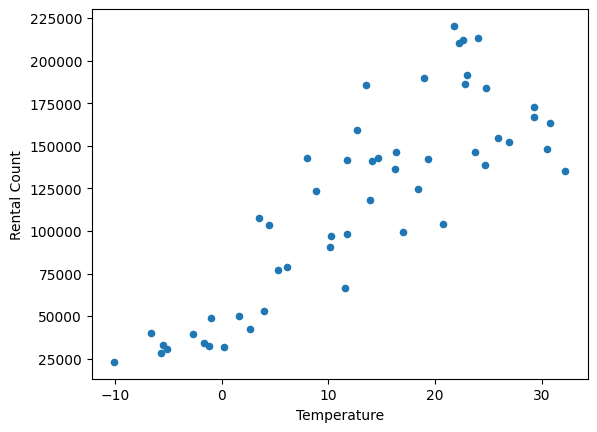

In [50]:
# Построим график вида scatter (график рассеивания) по Temperature и Rental Count в bikes_week
ax1 = bikes_week.plot.scatter(x='Temperature', y='Rental Count')

## Объясните код ниже

In [51]:
bikes.corr()

ValueError: could not convert string to float: 'Winter'

Корреляция между всеми столбцами

In [52]:
humidity_mean = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Humidity'].mean()
wind_mean = bikes.groupby(bikes['Date'].dt.isocalendar().week)['Wind speed'].mean()

Находим среднее значение влажности и скорости ветра для каждой недели

In [53]:
bikes_week = pd.concat([bikes_week, humidity_mean, wind_mean], axis=1)
bikes_week

,Temperature,Rental Count,Humidity,Wind speed
week,,,,
1,-2.694940,39441,43.660714,1.524405
2,-5.079762,30871,53.958333,1.995833
3,2.662500,42193,55.178571,1.385119
4,-10.038690,23079,38.410714,2.575000
5,-5.650595,28415,47.815476,2.256548
6,-5.486310,33259,41.571429,2.275000
7,-1.225298,32139,38.422619,2.332738
8,1.631548,50136,50.041667,2.055357
9,4.004167,52958,55.166667,1.770238


Соединяем значение средней влажности и скорости ветра с таблицей bikes_week

In [54]:
bikes_week.corr()
#обратите внимение на единицы по диагонали. Почему они появились? Оцените степень корреляции между атрибутами

,Temperature,Rental Count,Humidity,Wind speed
Temperature,1.000000,0.845808,0.584642,-0.420474
Rental Count,0.845808,1.000000,0.389963,-0.434142
Humidity,0.584642,0.389963,1.000000,-0.456225
Wind speed,-0.420474,-0.434142,-0.456225,1.000000


Единицы появились, так как это значение для корреляции признака с самим же собой, а корреляция показывает зависимость одного признака от другого. Самое большое значение корреляции для количества аренды и температуры. Можно сделать вывод, что при повышении температуры, количество аренды растет. Наименьшую корреляцию мы видим у признаков влажности и скорости ветра. Это объясняется тем, что два этих признака совсем не влияют друг на друга. Также достаточно высокое значение корреляции у влажности и температуры.

In [55]:
bikes_week.corr()['Rental Count']

Temperature     0.845808
Rental Count    1.000000
Humidity        0.389963
Wind speed     -0.434142
Name: Rental Count, dtype: float64

Выводим корреляцию для столбца Rental Count с другими столбцами

In [56]:
#Составьте список убывания коэффициента корреляции между всеми столбцами по убыванию (по модулю)


In [57]:
bikes['Seasons'].value_counts()

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

In [58]:
bikes['Seasons'] = bikes['Seasons'].astype("category")

In [59]:
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


In [60]:
bik = bikes.drop(['Seasons', 'Temperature Category'], axis=1)
bik.corr()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Holiday,Functioning Day,Rental Count,Normal Humidity,Good Weather
Date,1.000000e+00,2.467871e-15,0.578141,0.170064,-0.162069,0.037999,-0.136989,-6.604822e-02,-0.183785,0.287606,-0.001725,0.131424
Hour,2.467871e-15,1.000000e+00,0.123610,-0.241644,0.285197,0.008715,-0.021516,-1.391486e-16,0.005439,0.345622,0.107503,0.073698
Temperature,5.781407e-01,1.236105e-01,1.000000,0.159793,-0.036418,0.050758,-0.217846,-5.570102e-02,-0.049849,0.454749,0.025467,0.206979
Humidity,1.700643e-01,-2.416438e-01,0.159793,1.000000,-0.336683,0.236397,0.108183,-5.027765e-02,-0.020800,-0.169085,-0.285947,-0.115874
Wind speed,-1.620694e-01,2.851967e-01,-0.036418,-0.336683,1.000000,-0.019674,-0.003554,2.301677e-02,0.005037,0.097583,0.074964,0.032127
Rainfall,3.799870e-02,8.714642e-03,0.050758,0.236397,-0.019674,1.000000,0.008500,-1.426911e-02,0.002055,-0.103519,-0.095339,-0.042127
Snowfall,-1.369888e-01,-2.151645e-02,-0.217846,0.108183,-0.003554,0.008500,1.000000,-1.259072e-02,0.032089,-0.120869,-0.067939,-0.054942
Holiday,-6.604822e-02,-1.391486e-16,-0.055701,-0.050278,0.023017,-0.014269,-0.012591,1.000000e+00,-0.027624,-0.068822,-0.020156,0.029008
Functioning Day,-1.837852e-01,5.439377e-03,-0.049849,-0.020800,0.005037,0.002055,0.032089,-2.762445e-02,1.000000,0.173437,0.002488,-0.101806
Rental Count,2.876055e-01,3.456218e-01,0.454749,-0.169085,0.097583,-0.103519,-0.120869,-6.882160e-02,0.173437,1.000000,0.128521,0.194224


In [61]:
a = bik.corr().abs()
a1 = a.unstack()
a2 = a1.drop_duplicates()
a2[0] = 0 #Hour от Hour устанавливаем в 0. Он не удалился после очищения дубликатов
a3 = a2.sort_values(ascending = False)
print(a3)

Date             Temperature        5.781407e-01
Temperature      Rental Count       4.547491e-01
Normal Humidity  Good Weather       4.401018e-01
Hour             Rental Count       3.456218e-01
Humidity         Wind speed         3.366830e-01
                                        ...     
Rainfall         Functioning Day    2.054573e-03
Date             Normal Humidity    1.724908e-03
                 Hour               2.467871e-15
Hour             Holiday            1.391486e-16
Date             Date               0.000000e+00
Length: 67, dtype: float64
